In [37]:
import pandas as pd
import re
import numpy as np
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.text import Tokenizer
#from tensorflow.keras.utils import np_utils
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn import tree
from tensorflow.keras.preprocessing import sequence
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.svm import SVC
from sklearn import svm
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MekdimTamirat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# loading the dataset

In [38]:
HSD_data = pd.read_csv('C:/Users/MekdimTamirat/Documents/Active Projects/hateSpeechDetectionOnSocailMedia/data_HSD_final.csv')
HSD_data.columns = ['Text', 'Catagory'] # give column names


In [39]:
HSD_data.head()
HSD_data.tail()

,Text,Catagory
9394,ይህ ቆሻሻ መንግስት ህዝብ አስጨረሰ እባካችሁ ለዚህ የዋህ ሚስኪን ህዝብ/...,hate-speech
9395,ሀሀሀሀሀሀሀሀ አበረ አዳሙ የአንተን በደል ጊዜ ይመልሰው,hate-speech
9396,እስክንድር ጋ ተገናኝ የአአ መሪ እሱ ነው ታኬ ህገወጥ ነው!!,hate-speech
9397,ፎቶ ብቻ ጉራ ብቻ መጀመሪያ የ አ.አ ልጆችን ፍታ,hate-speech
9398,የኦርቶዶክስ እያፈረሱ የሌላን ይገነባሉ ድሮም ሴጣን ቤቱን ለማደስ ይሮጣል...,hate-speech


# displaying with histogram the two node values

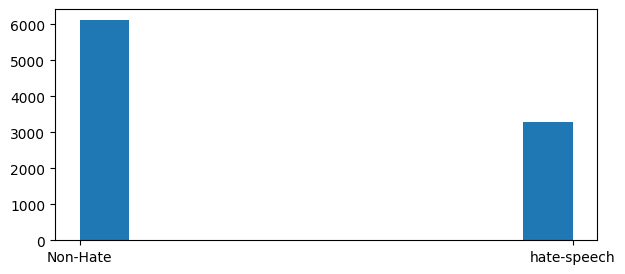

In [40]:
# Creating histogram
fig, ax = plt.subplots(figsize =(7, 3))
ax.hist(HSD_data['Catagory'])
 
# Show plot
plt.show()


# --------  ignoring the fact that the datas are unbalanced !!! ------------

# pre-processing the data


### Step -1 

In [41]:
words = HSD_data['Text']
finalWords = []
for word in words:
    
    word = word.strip() # removing the uncessary word whitespaces
    
    #remove any non-alphanumeric character
    word = re.sub(r'\W', ' ', str(word))
    
    #remove any digit
    word = re.sub("(\\d)+"," ",word)
    
    #remove punctuation 
    word = re.sub(",#'!:;"," ",word)
    
    #remove any latin characters 
    word = re.sub(r'[a-zA-Z]+', '', word)

    word = re.sub('\s+', ' ', word)  # remove extra whitespace
    finalWords.append(word)



###  step -2 

In [42]:
tokenizedList = []
for lineWord in finalWords:
    separatedWords = lineWord.split(' ')
    word = [word for word in separatedWords if   word.strip() != '']
    tokenizedList.append(word)
    

### step -3

In [43]:
# list amharic stop words
stopwords=['ነው', 'እና', 'እኔ', 'የእኔ','እኔ','ራሴ','እኛ','የእኛ','እኛ','ራሳችን','አንቺ' ,'የእርስዎ' ,'እራስዎ','እራሳችሁን','የእሱ',
           'እሱ','እ','ራሱ','እሷ' 'ራሷን','እሱ','በራሱ','እነሱ','የእነሱ','እራሳቸው','ምንድን','የት','ማን','ይሄ','ያንን','እነዚህ','እነዚያ'
           ,'ነው','እነዚህ','ናቸው','ነበር','ነበሩ','መሆን','ሆኗል','መሆን','አለ','ነበሩ','አለው','መስራት','ያደርገዋል','አደረጉት',
           'ማድረግ','እና','ግን','ከሆነ','ወይም','ምክንያቱም','እንደ','እስከ','ገና','የ','ለ','ከ','ጋር','ስለ','መካከል','ውስጥ',
           'ከዚህ','በፊት','በኋላ','ከላይ','ከታች','ወደ','ከ','ወደ','ላይ','ታች','ውስጥ','ውጭ','በላይ','በታች','በድጋሚ','እናስ','እናም']

           
cleanedWordsList= []
for lineWords in tokenizedList:
    tempList = []
    for word in lineWords:
        if word.strip() not in stopwords:
            tempList.append(word)
    cleanedWordsList.append(tempList)
    
        

### Step -4 

In [44]:
# for the time being this is fine but convert it to something good but not this at all

normalizedSenteces = []
for linesWords in cleanedWordsList:
    tempList = []
    for word in linesWords:
        
        word = re.sub("ሐ","ሀ",word)
        word = re.sub("ሑ","ሁ",word)
        word = re.sub("ሒ","ሂ",word)
        word = re.sub("ሓ","ሃ",word)
        word = re.sub("ሔ","ሄ",word)
        word = re.sub("ሕ","ህ",word)
        word = re.sub("ሖ","ሆ",word)
        
        word = re.sub("ኀ","ሀ",word)
        word = re.sub("ኁ","ሁ",word)
        word = re.sub("ኂ","ሂ",word)
        word = re.sub("ኃ","ሃ",word)
        word = re.sub("ኄ","ሄ",word)
        word = re.sub("ኅ","ህ",word)
        word = re.sub("ኆ","ሆ",word)
        
        word = re.sub("ሠ","ሰ",word)
        word = re.sub("ሡ","ሱ",word)
        word = re.sub("ሢ","ሲ",word)
        word = re.sub("ሣ","ሳ",word)
        word = re.sub("ሤ","ሴ",word)
        word = re.sub("ሥ","ስ",word)
        word = re.sub("ሦ","ሶ",word)
        
        word = re.sub("ዐ","አ",word)
        word = re.sub("ዑ","ኡ",word)
        word = re.sub("ዒ","ኢ",word)
        word = re.sub("ዓ","ኣ",word)
        word = re.sub("ዔ","ኤ",word)
        word = re.sub("ዕ","እ",word)
        word = re.sub("ዖ","ኦ",word)
        
        word = re.sub("ዐ","አ",word)
        word = re.sub("ዑ","ኡ",word)
        word = re.sub("ዒ","ኢ",word)
        word = re.sub("ዓ","ኣ",word)
        word = re.sub("ዔ","ኤ",word)
        word = re.sub("ዕ","እ",word)
        word = re.sub("ዖ","ኦ",word)
        
        word = re.sub("ጸ","ፀ",word)
        word = re.sub("ጹ","ፁ",word)
        word = re.sub("ጺ","ፂ",word)
        word = re.sub("ጻ","ፃ",word)
        word = re.sub("ጼ","ፄ",word)
        word = re.sub("ጽ","ፅ",word)
        word = re.sub("ጾ","ፆ",word)
        
        tempList.append(word)
    normalizedSenteces.append(tempList)
               

In [45]:
HSD_data['Catagory'] = HSD_data.Catagory.map({'Non-Hate':1,'hate-speech':0})

In [46]:
# Split into training and testing data
x = HSD_data['Text']
y = HSD_data['Catagory']


# Word2Vec Vectorizer

In [47]:
# Create w2v
import os
numberofAvailCpu = os.cpu_count()      

w2v = Word2Vec(sentences = normalizedSenteces,
                    vector_size= 300, 
                    window = 10,
                    min_count = 2,
                    workers = numberofAvailCpu,
                    epochs = 15
              ) 


In [48]:
#.....................Sequence Padding...........................
# Get w2v embedding matrix
embedding_matrix = w2v.wv.vectors  # embedding matrix, type = numpy.ndarray 
print("Shape of embedding matrix : ", embedding_matrix.shape) #(volcabulary size, embedding dimension)
#print("feature vector of the first word in the volcabulary list: \n", w2v.wv.vectors[0]) 

top_words = embedding_matrix.shape[0]
MAX_SEQUENCE_LENGTH = 200 #max lenght of sentence


tokenizer_obj = Tokenizer(num_words=top_words)
tokenizer_obj.fit_on_texts(normalizedSenteces)
sequences = tokenizer_obj.texts_to_sequences(normalizedSenteces)

word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))
#print(word_index)

SentData_pad = sequence.pad_sequences(sequences,maxlen = MAX_SEQUENCE_LENGTH)

print('Preparing embedding matrix')
nb_words = len(word_index)+1
embedding_matrix = np.zeros((nb_words, 300))
for word, i in word_index.items():
    if word in w2v.wv.key_to_index: # the word2vec model
        embedding_matrix[i] = w2v.wv.word_vec(word)
print('Null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))

Shape of embedding matrix :  (13556, 300)
Found 27963 unique tokens.
Preparing embedding matrix
Null word embeddings: 14408


C:\Users\MekdimTamirat\AppData\Local\Temp\ipykernel_12836\1424927441.py:26: DeprecationWarning: Call to deprecated `word_vec` (Use get_vector instead).
  embedding_matrix[i] = w2v.wv.word_vec(word)


In [49]:
#encode the class attribute
y = np.asarray(HSD_data['Catagory'])
label_map = {cat:index for index,cat in enumerate(np.unique(y))}
y_prep = np.asarray([label_map[l] for l in y])

# Non-Hate':1, 'hate-speech' :  0
label_map

{0: 0, 1: 1}

In [50]:
#............split dataset into traning and test data...........................
x_train_pad, x_test_pad, y_train, y_test = train_test_split(SentData_pad, y_prep, test_size=0.20, random_state=42)

print('X_train shape:', x_train_pad.shape)
print('X_test shape:', x_test_pad.shape)
print('y_train shape:', y_train.shape) 
print('y_test shape:', y_test.shape) 

X_train shape: (7519, 200)
X_test shape: (1880, 200)
y_train shape: (7519,)
y_test shape: (1880,)


## SVM with Word2vec 

In [51]:
# Perform classification with SVM, kernel=rbf
SVM = svm.SVC(kernel='rbf')
SVM.fit(x_train_pad, y_train)


SVC()

#### predicting the and getting necessary accurracy -- svm


In [52]:
# prediction 
predicted_svm = SVM.predict(x_test_pad)

# Score
SVM_score = SVM.score(x_test_pad, y_test)

accuracy_score_svm =metrics.accuracy_score(y_test, predicted_svm)
confusion_matric_svm = metrics.confusion_matrix(y_test, predicted_svm)
classification_score_svm = metrics.classification_report(y_test, predicted_svm)
precission_score_svm = metrics.precision_score(y_test, predicted_svm)
recall_score_svm = metrics.recall_score(y_test, predicted_svm)

In [53]:
print(SVM_score)
print(accuracy_score_svm)
print(confusion_matric_svm)
print(classification_score_svm)
print(precission_score_svm)
print(recall_score_svm)


0.7797872340425532
0.7797872340425532
[[ 266  402]
 [  12 1200]]
              precision    recall  f1-score   support

           0       0.96      0.40      0.56       668
           1       0.75      0.99      0.85      1212

    accuracy                           0.78      1880
   macro avg       0.85      0.69      0.71      1880
weighted avg       0.82      0.78      0.75      1880

0.7490636704119851
0.9900990099009901


Text(50.722222222222214, 0.5, 'y_pred')

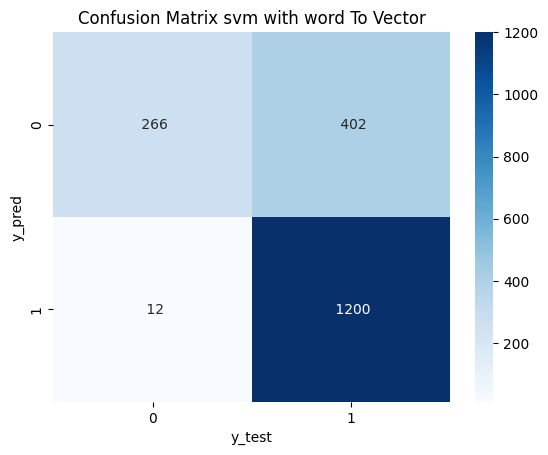

In [54]:
cm_svm=confusion_matrix(y_test,predicted_svm)
ax_svm=sns.heatmap(cm_svm,annot=True,cmap='Blues',fmt=' ')
ax_svm.set_title('Confusion Matrix svm with word To Vector')
ax_svm.set_xlabel('y_test')
ax_svm.set_ylabel('y_pred')

### Word To Vector WITH NAIVE BAYES

In [55]:
model_NB = MultinomialNB()
model_NB.fit(x_train_pad, y_train)

MultinomialNB()

#### predicting the and getting necessary accurracy -- NB

In [56]:
# prediction 
predicted = model_NB.predict(x_test_pad)

# Score
nb_score = model_NB.score(x_test_pad, y_test)


accuracy_score = metrics.accuracy_score(y_test, predicted)
confusion_matric = metrics.confusion_matrix(y_test, predicted)
classification_score = metrics.classification_report(y_test, predicted)
precission_score = metrics.precision_score(y_test, predicted)
recall_score = metrics.recall_score(y_test, predicted)


In [57]:
print(nb_score)
print(accuracy_score)
print(confusion_matric)
print(classification_score)
print(precission_score)
print(recall_score)
print()

0.6111702127659574
0.6111702127659574
[[  95  573]
 [ 158 1054]]
              precision    recall  f1-score   support

           0       0.38      0.14      0.21       668
           1       0.65      0.87      0.74      1212

    accuracy                           0.61      1880
   macro avg       0.51      0.51      0.47      1880
weighted avg       0.55      0.61      0.55      1880

0.647818070067609
0.8696369636963697



Text(50.722222222222214, 0.5, 'y_pred')

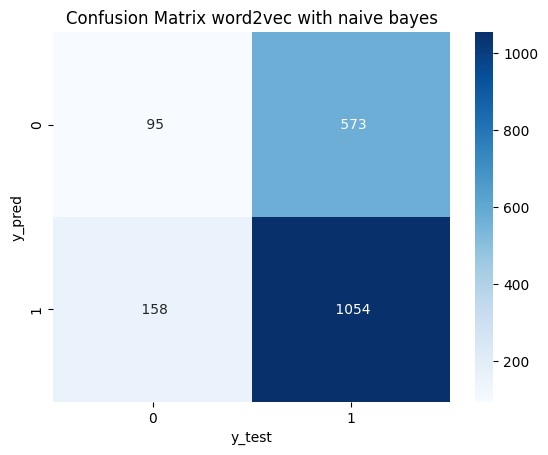

In [58]:
cm=confusion_matrix(y_test,predicted)
ax=sns.heatmap(cm,annot=True,cmap='Blues',fmt=' ')
ax.set_title('Confusion Matrix word2vec with naive bayes')
ax.set_xlabel('y_test')
ax.set_ylabel('y_pred')

## TF-IDF RandomForestClassifier

In [59]:
# creating a RF classifier
RandomForest = RandomForestClassifier(n_estimators = 100, n_jobs=-1)
RandomForest = RandomForest.fit(x_train_pad, y_train)

In [60]:

# prediction 
predicted_rf = RandomForest.predict(x_test_pad)

# Score
RF_score_rf = RandomForest.score(x_test_pad, y_test)

accuracy_score_rf=metrics.accuracy_score(y_test, predicted_rf)
confusion_matric_rf = metrics.confusion_matrix(y_test, predicted_rf)
classification_score_rf = metrics.classification_report(y_test, predicted_rf)
precission_score_rf = metrics.precision_score(y_test, predicted_rf)
recall_score_rf= metrics.recall_score(y_test, predicted_rf)

In [61]:
print(RF_score_rf)
print(accuracy_score_rf)
print(confusion_matric_rf)
print(classification_score_rf)
print(precission_score_rf)
print(recall_score_rf)

0.877127659574468
0.877127659574468
[[ 484  184]
 [  47 1165]]
              precision    recall  f1-score   support

           0       0.91      0.72      0.81       668
           1       0.86      0.96      0.91      1212

    accuracy                           0.88      1880
   macro avg       0.89      0.84      0.86      1880
weighted avg       0.88      0.88      0.87      1880

0.8636026686434396
0.9612211221122112


Text(50.722222222222214, 0.5, 'y_pred')

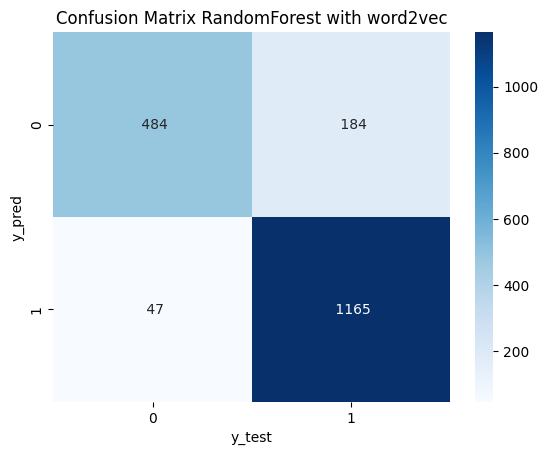

In [62]:
cm_rf=confusion_matrix(y_test,predicted_rf)
ax_rf=sns.heatmap(cm_rf,annot=True,cmap='Blues',fmt=' ')
ax_rf.set_title('Confusion Matrix RandomForest with word2vec')
ax_rf.set_xlabel('y_test')
ax_rf.set_ylabel('y_pred')